In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical


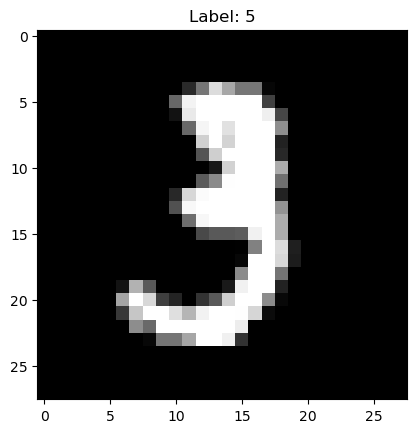

In [3]:
import matplotlib.pyplot as plt

# 加載數據
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[10], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

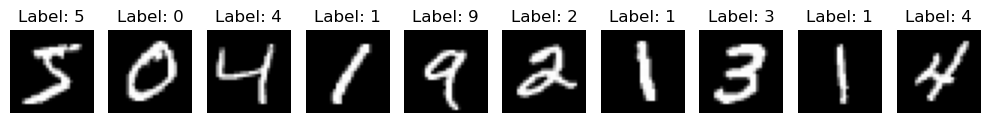

In [5]:
# 使用 matplotlib 顯示多張 MNIST 圖像

# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 處理數據
x_train = x_train[:100]
y_train = y_train[:100]

x_test = x_test[:100]
y_test = y_test[:100]
print(x_train.shape)

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train.shape)



(100, 28, 28)
(100, 28, 28, 1)


In [ ]:
# 建立模型
# 建立模型
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



In [ ]:
losss=history.history['loss']
print(losss)

In [ ]:
import matplotlib.pyplot as plt
# model.evaluate(x_test, y_test)
# loss = model.evaluate(x_test, y_test)
# print(1)
losss=history.history['loss']
# 繪製訓練歷史
plt.plot(losss, label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [4]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


4/4 [==============================] - 0s 3ms/step


NameError: name 'plt' is not defined

In [5]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

4/4 [==============================] - 0s 2ms/step - loss: 0.8470 - accuracy: 0.6900
Test accuracy: 0.6899999976158142
